In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# 경고 메시지가 뜨지 않게 설정
import warnings 
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 검정
from scipy import stats

In [2]:
check = pd.read_parquet('2018_성과정보.parquet')
target = pd.read_parquet('2018_회원정보.parquet', columns = ['기준년월', 'Segment'])
target = target.loc[(target['기준년월'] == 201812) & (target['Segment'].notna()), 'Segment']
target = target.reset_index(drop = True)
df = pd.read_csv('병합_selected_features.csv')

In [3]:
# df[list(check.columns)]

In [4]:
drop_list = ['기준년월', '증감율_이용건수_신용_전월', '증감율_이용건수_신판_전월', '증감율_이용건수_일시불_전월', '증감율_이용건수_할부_전월',
             '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월', '증감율_이용건수_카드론_전월', '증감율_이용금액_신용_전월', '증감율_이용금액_신판_전월',
             '증감율_이용금액_일시불_전월', '증감율_이용금액_할부_전월', '증감율_이용금액_CA_전월', '증감율_이용금액_체크_전월', '증감율_이용금액_카드론_전월',
             '증감율_이용건수_신용_분기', '증감율_이용건수_신판_분기', '증감율_이용건수_일시불_분기', '증감율_이용건수_할부_분기', '증감율_이용건수_CA_분기',
             '증감율_이용건수_체크_분기', '증감율_이용건수_카드론_분기', '증감율_이용금액_할부_분기', '증감율_이용금액_CA_분기', '증감율_이용금액_체크_분기',
             '증감율_이용금액_카드론_분기', '잔액_신판최대한도소진율_r6m', '잔액_신판평균한도소진율_r3m', '잔액_신판최대한도소진율_r3m',
             '잔액_신판ca평균한도소진율_r6m', '잔액_신판ca최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m',
             '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_카드론평잔', '변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M',
             '혜택수혜율_R3M', '혜택수혜율_B0M']

In [5]:
df = df[list(check.drop(drop_list, axis = 1).columns)]

In [6]:
target

0         D
1         E
2         C
3         D
4         E
         ..
399995    E
399996    D
399997    C
399998    E
399999    E
Name: Segment, Length: 400000, dtype: object

In [7]:
df = pd.concat([df, target], axis = 1)

In [8]:
df

,ID,증감율_이용금액_신용_분기,증감율_이용금액_신판_분기,증감율_이용금액_일시불_분기,잔액_신판평균한도소진율_r6m,변동률_일시불평잔,변동률_RVCA평잔,Segment
0,TRAIN_000000,-0.415602,-0.415602,-0.420739,0.090446,0.829721,0.999998,D
1,TRAIN_000001,-0.381925,-0.381925,-0.381925,0.546306,0.874079,0.999998,E
2,TRAIN_000002,-0.158373,-0.020045,-0.016107,0.218667,1.082143,0.000000,C
3,TRAIN_000003,0.003757,-0.228132,-0.002996,0.391021,1.019556,0.999998,D
4,TRAIN_000004,1.999996,1.999996,1.999996,0.000000,0.999998,0.999998,E
...,...,...,...,...,...,...,...,...
399995,TRAIN_399995,0.000000,0.000000,0.000000,0.000000,0.999998,0.999998,E
399996,TRAIN_399996,-0.792478,-0.792478,-0.792478,0.093331,0.615087,0.999998,D
399997,TRAIN_399997,0.042752,0.042752,-0.054839,0.115658,1.036370,0.999998,C
399998,TRAIN_399998,0.000000,0.000000,0.000000,0.000000,0.999998,0.999998,E


In [21]:
df['증감율_이용금액_신용_분기'].value_counts()

증감율_이용금액_신용_분기
 0.000000    92419
-1.999996     9043
 1.999996     2662
-0.197130        2
-0.301757        2
             ...  
-0.180676        1
-1.067322        1
-0.143032        1
-0.096563        1
 0.287903        1
Name: count, Length: 295271, dtype: int64

In [22]:
df.columns

Index(['ID', '증감율_이용금액_신용_분기', '증감율_이용금액_신판_분기', '증감율_이용금액_일시불_분기',
       '잔액_신판평균한도소진율_r6m', '변동률_일시불평잔', '변동률_RVCA평잔', 'Segment'],
      dtype='object')

In [30]:
df[['잔액_신판평균한도소진율_r6m', '변동률_일시불평잔', '변동률_RVCA평잔']].corr()

,잔액_신판평균한도소진율_r6m,변동률_일시불평잔,변동률_RVCA평잔
잔액_신판평균한도소진율_r6m,1.000000,0.104609,0.150028
변동률_일시불평잔,0.104609,1.000000,0.660506
변동률_RVCA평잔,0.150028,0.660506,1.000000


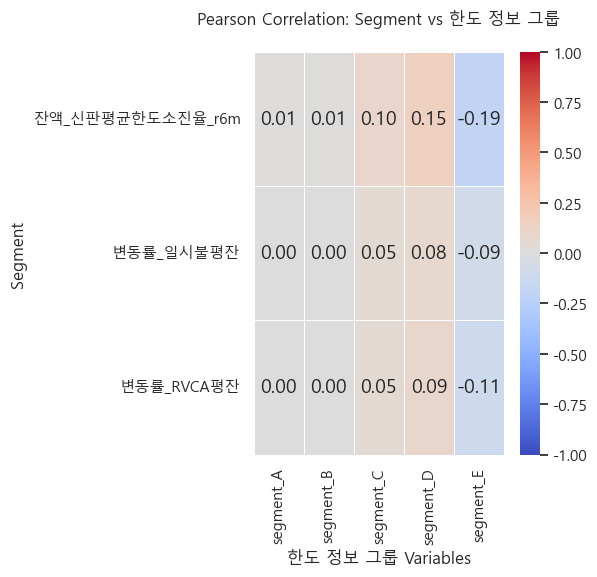

In [29]:
# Segment
target = df['Segment']

# segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(target, prefix='segment')

check_df = df[['잔액_신판평균한도소진율_r6m', '변동률_일시불평잔', '변동률_RVCA평잔']]

corr_df = pd.concat([check_df, segment_dummies], axis = 1)

# 전체 상관계수 구하기 (피어슨 방식이 기본)
corr_matrix = corr_df.corr()

# segment_dummies 행 vs numeric_cols 열만 추출
segment_corr = corr_matrix.loc[segment_dummies.columns, check_df.columns]

# 히트맵 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(segment_corr.T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin = -1, vmax = 1)
plt.title('Pearson Correlation: Segment vs 한도 정보 그룹', pad = 20)
plt.xlabel('한도 정보 그룹 Variables')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

- 상관계수가 높은 칼럼 제외

In [32]:
df['잔액_신판평균한도소진율_r6m'].value_counts(normalize = True)

잔액_신판평균한도소진율_r6m
0.000000    0.253360
0.005103    0.000008
0.048572    0.000008
0.002063    0.000008
0.001546    0.000008
              ...   
0.331476    0.000003
0.003570    0.000003
0.050548    0.000003
0.132568    0.000003
0.030399    0.000003
Name: proportion, Length: 295931, dtype: float64

In [38]:
E_df = df.loc[df['Segment'] == 'E']
CD_df = df.loc[df['Segment'].isin(['C', 'D'])]
AB_df = df.loc[df['Segment'].isin(['A', 'B'])]

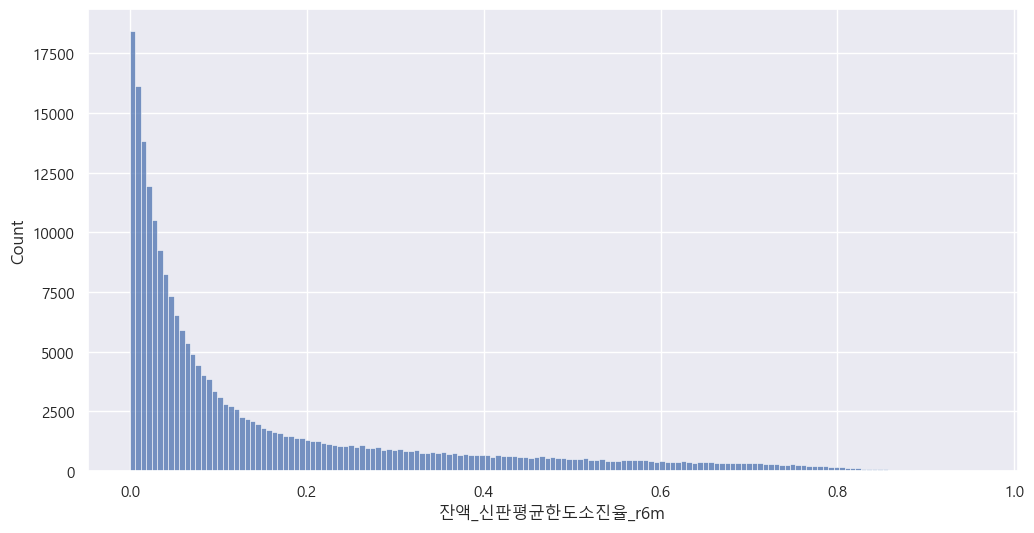

In [39]:
a1 = E_df.loc[E_df['잔액_신판평균한도소진율_r6m'] != 0]
sns.histplot(data = a1, x = '잔액_신판평균한도소진율_r6m')
plt.show()

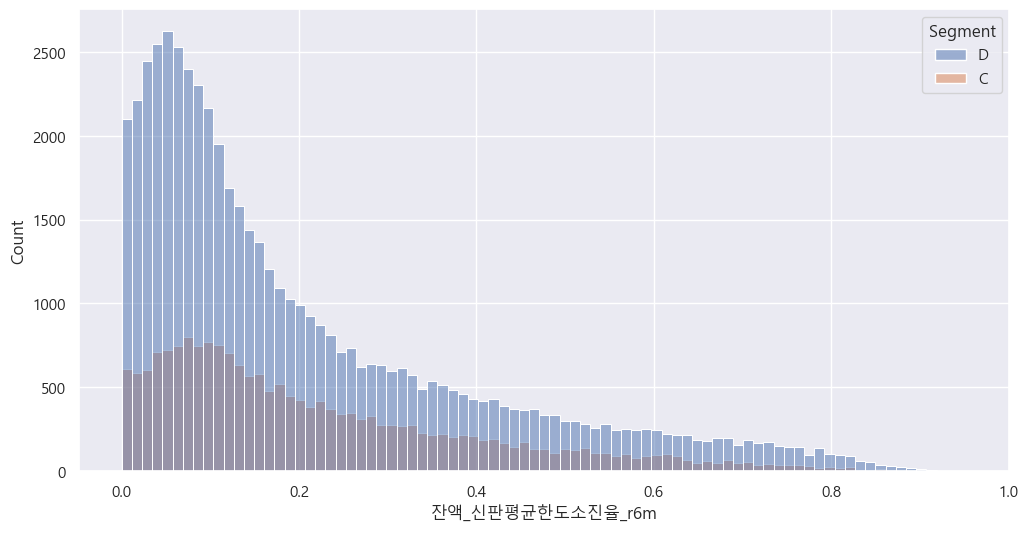

In [41]:
a1 = CD_df.loc[CD_df['잔액_신판평균한도소진율_r6m'] != 0]
sns.histplot(data = a1, x = '잔액_신판평균한도소진율_r6m', hue = 'Segment')
plt.show()

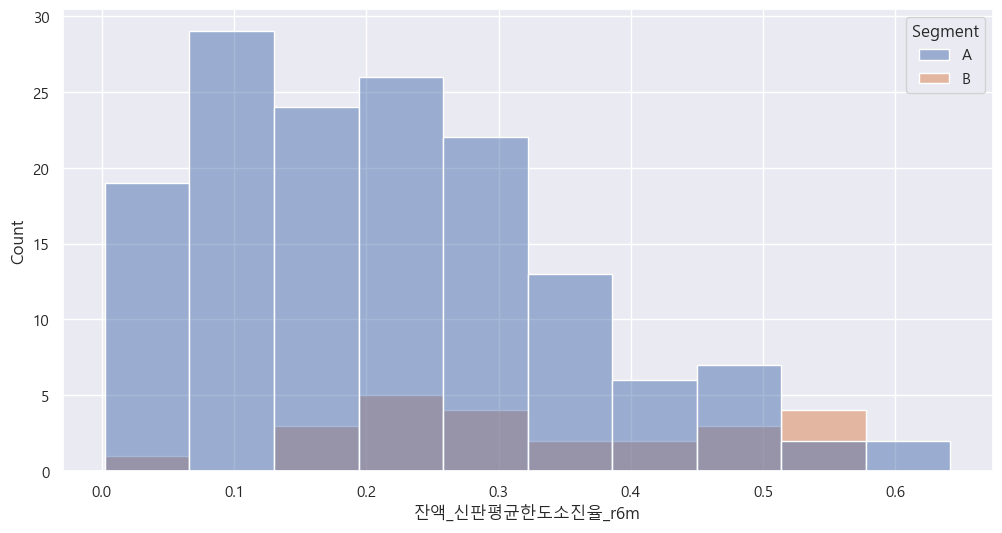

In [43]:
a1 = AB_df.loc[AB_df['잔액_신판평균한도소진율_r6m'] != 0]
sns.histplot(data = a1, x = '잔액_신판평균한도소진율_r6m', hue = 'Segment')
plt.show()

- 분포의 형태가 비슷하여 유의미한 차이는 없다.

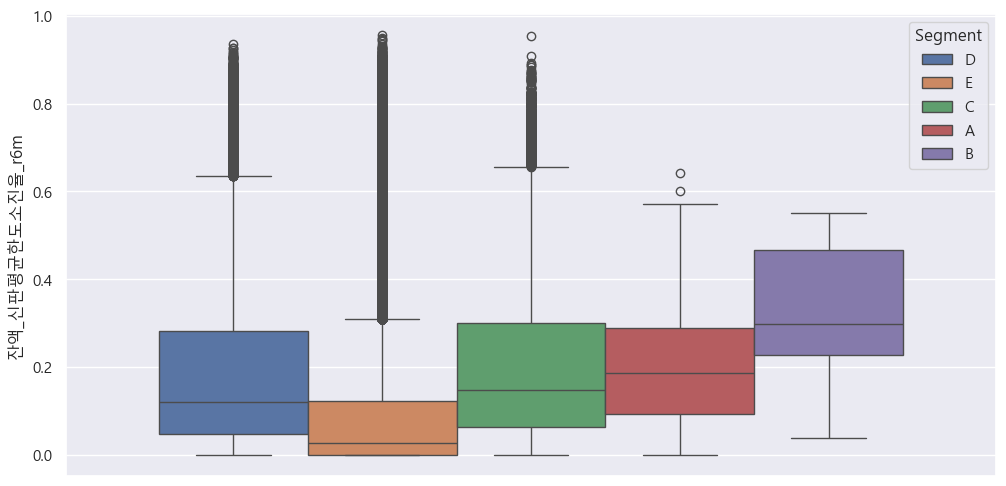

In [45]:
sns.boxplot(data = df, y = '잔액_신판평균한도소진율_r6m', hue = 'Segment')
plt.show()

#### 변동률_일시불평잔
- 일시불 평균잔액의 변동률을 나타내는 데이터

In [46]:
df['변동률_일시불평잔'].value_counts()

변동률_일시불평잔
0.999998    64367
0.000000    34654
0.910628        3
0.838783        3
0.949072        3
            ...  
0.757194        1
0.767935        1
0.848083        1
1.046763        1
1.080614        1
Name: count, Length: 299413, dtype: int64

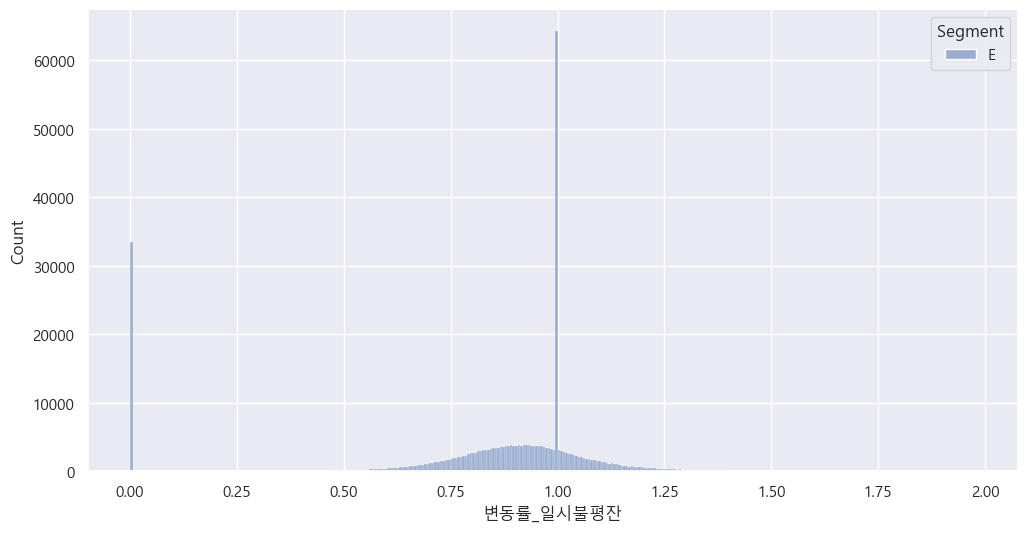

In [48]:
sns.histplot(data = E_df, x = '변동률_일시불평잔', hue = 'Segment')
plt.show()

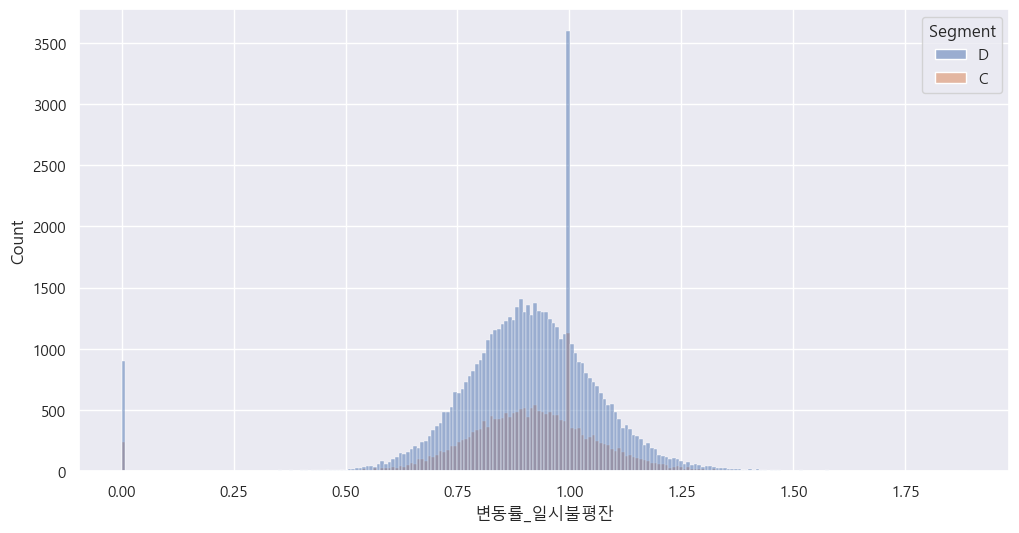

In [49]:
sns.histplot(data = CD_df, x = '변동률_일시불평잔', hue = 'Segment')
plt.show()

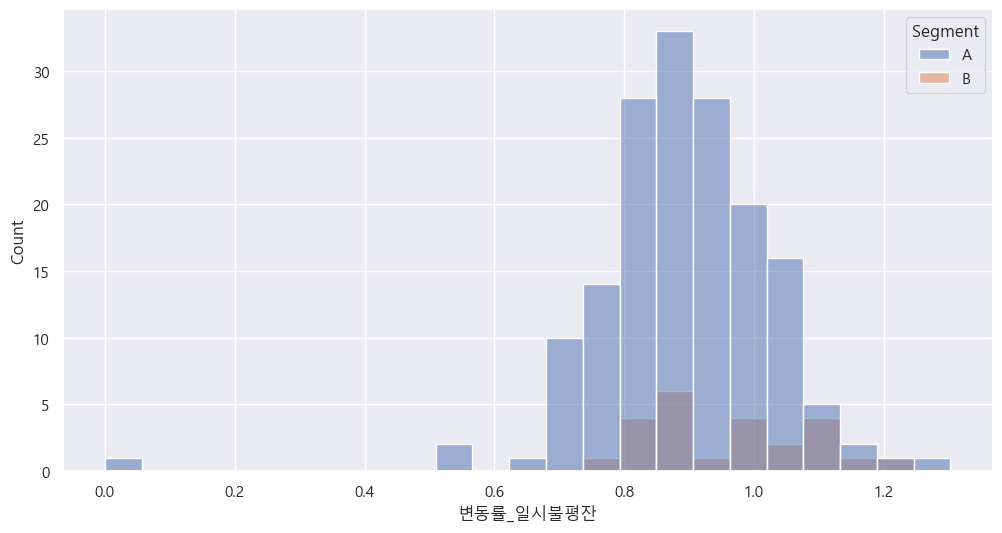

In [50]:
sns.histplot(data = AB_df, x = '변동률_일시불평잔', hue = 'Segment')
plt.show()

In [53]:
df['변동률_RVCA평잔'].value_counts(normalize = True)

변동률_RVCA평잔
0.999998    0.946910
0.000000    0.051940
0.988150    0.000003
0.993396    0.000003
0.996279    0.000003
              ...   
0.867213    0.000003
0.997327    0.000003
0.991166    0.000003
0.990421    0.000003
0.993757    0.000003
Name: proportion, Length: 462, dtype: float64

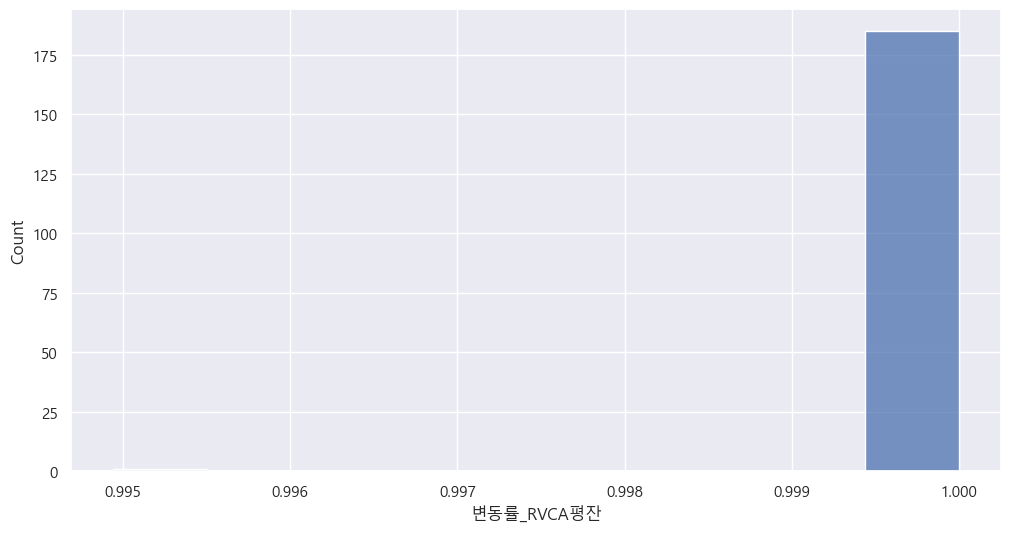

In [60]:
sns.histplot(data = AB_df, x = '변동률_RVCA평잔')
plt.show()

In [ ]:
'잔액_신판평균한도소진율_r6m', '변동률_일시불평잔', '변동률_RVCA평잔'